In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Q1. Downloading the data
**Read the data for January. How many records are there?**

In [4]:
#Uncomment the codes below to dowlaod the data

# !wget -O ./data/jan.parquet https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet --no-check-certificate
# !wget -O ./data/feb.parquet https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet --no-check-certificat'''

In [5]:
jan_df = pd.read_parquet('./data/jan.parquet')
feb_df = pd.read_parquet('./data/feb.parquet')

In [6]:
len(jan_df)

1154112

## Q2. Computing duration

**What's the average trip duration in January?**

In [7]:
jan_df['duration'] = jan_df.dropOff_datetime - jan_df.pickup_datetime
jan_df.duration = jan_df.duration.apply(lambda td: td.total_seconds() / 60)
jan_df.duration.mean()

19.1672240937939

## Data preparation

**Check the distribution of the duration variable.**

D:\ProgramFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


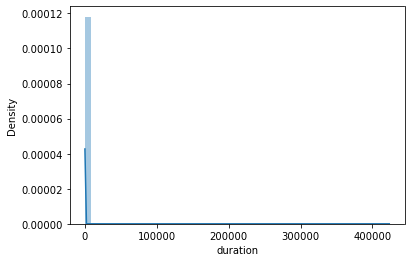

In [8]:
sns.distplot(jan_df.duration)
plt.show()

In [9]:
jan_df.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [10]:
jan_df2 = jan_df[(jan_df.duration >= 1) & (jan_df.duration <= 60)]

len(jan_df) - len(jan_df2)

44286

In [11]:
features = jan_df2[["PUlocationID","DOlocationID"]].fillna(-1)

len(features[features["PUlocationID"] == -1])/len(features)*100

83.52732770722618

## Q4. One-hot encoding

**Turn the dataframe into a list of dictionaries**

In [12]:
dv = DictVectorizer()

#Turn the dataframe into a list of dictionaries
train_dicts = features.to_dict(orient='records')
#Fit a dictionary vectorizer
X_train = dv.fit_transform(train_dicts)
#Get a feature matrix from it
X_train

<1109826x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [13]:
#Dimensionality of this matrix
X_train.shape

(1109826, 2)

## Q5. Training a model

**Train a plain linear regression model with default parameters**

In [14]:
y_train = jan_df2['duration'].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

11.415432830521663

## Q6. Evaluating the model

In [15]:
feb_df['duration'] = feb_df.dropOff_datetime - feb_df.pickup_datetime
feb_df.duration = feb_df.duration.apply(lambda td: td.total_seconds() / 60)

feb_df2 = feb_df[(feb_df.duration >= 1) & (feb_df.duration <= 60)]
features2 = feb_df2[["PUlocationID","DOlocationID"]].fillna(-1)

val_dicts = features2.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_val = feb_df2['duration'].values

y_pred2 = lr.predict(X_val)

mean_squared_error(y_val, y_pred2, squared=False)

11.85822362355935